In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io
%matplotlib inline

In [2]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

In [3]:
def loss(a, y):
    J = -np.sum(y*np.log(a) + (1-y)*np.log(1-a))
    return J

In [4]:
def activate(w, b, x):
    z = np.dot(w, x) + b
    a = sigmoid(z)
    return a

In [5]:
def grads(x, a, y):
    m = y.shape[-1]
    dJ_da = -np.divide(y, a) + np.divide(1-y, 1-a)
    da_dz = a*(1-a)
    dz_dw = x
    dJ_dz = dJ_da*da_dz
    dw = 1/m*np.dot(dJ_dz, dz_dw.T)
    db = 1/m*np.sum(dJ_dz, axis=1, keepdims=True)
    return dw, db

In [6]:
def load_2D_dataset():
    data = scipy.io.loadmat('/Users/zetong/data.mat')
    train_X = data['X'].T
    train_Y = data['y'].T
    test_X = data['Xval'].T
    test_Y = data['yval'].T
    plt.scatter(train_X[0, :], train_X[1, :], c=train_Y.reshape(train_Y.shape[-1]), s=40, cmap=plt.cm.Spectral);
    return train_X, train_Y, test_X, test_Y

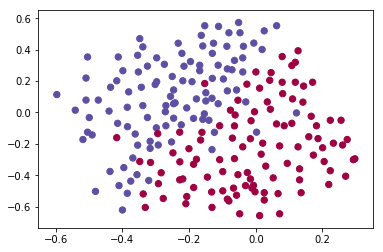

In [7]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [8]:
print(train_X.shape, train_Y.shape)

(2, 211) (1, 211)


In [9]:
def batchify(X, Y, batch_size):
    m = X.shape[-1]
    for idx in range(0, m, batch_size):
        yield(X[:, idx:min(idx + batch_size, m)], Y[:, idx:min(idx + batch_size, m)])

In [19]:
sdw = 0
sdb = 0
epoches = 50
beta = 0.9
learning_rate = 0.1
epsilon = 10e-8
batch_size = 32
w = np.random.randn(1, 2)*0.01
b = np.zeros((1, 1))

for i in range(epoches):
    for X_batch, Y_batch in batchify(train_X, train_Y, batch_size):
        y_hat = activate(w, b, X_batch)
        J = loss(y_hat, Y_batch)
        dw, db= grads(X_batch, y_hat, Y_batch)
        sdw = beta * sdw + (1-beta)*np.square(dw)
        sdb = beta * sdb + (1-beta)*np.square(db)
        w = w - learning_rate * np.divide(dw, np.sqrt(sdw) + epsilon)
        b = b - learning_rate * np.divide(db, np.sqrt(sdb) + epsilon)
    if i % 5 == 0:
        print("loss: ", J)
        pred = activate(w, b, test_X)
        pred = (pred > 0.5).astype("int")
        acc = (pred == test_Y).astype("int")
        acc = np.sum(acc)/acc.shape[-1]
        print("val acc: " + str(acc*100) + "%")

loss:  11.06655421213121
val acc: 75.5%
loss:  9.473187374377648
val acc: 85.5%
loss:  9.125398167893623
val acc: 88.5%
loss:  8.974130397382956
val acc: 91.5%
loss:  8.929642974814392
val acc: 93.0%
loss:  8.936421285035115
val acc: 93.5%
loss:  8.96641977130764
val acc: 93.5%
loss:  9.006655994381326
val acc: 93.5%
loss:  9.050751575125691
val acc: 92.5%
loss:  9.095428217650088
val acc: 92.5%


In [20]:
pred = activate(w, b, test_X)
pred = (pred > 0.5).astype("int")
acc = (pred == test_Y).astype("int")
acc = np.sum(acc)/acc.shape[-1]
acc

0.925